In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
sns.set()
import os
import glob

In [2]:
plt.rcParams['figure.figsize'] = [25, 15]

In [5]:
treasury_data_path = r'..\..\data\raw\daily_data'

In [6]:
T_list = os.listdir(treasury_data_path + '/T')
TF_list = os.listdir(treasury_data_path + '/TF')
TS_list = os.listdir(treasury_data_path + '/TS')

In [7]:
columns = ['Open', 'High', 'Low', 'Close', 'Settle', 'Volume', 'Turnover', 'Open_Interest']

In [8]:
def min_threshold_filter(df, field, filter_field, min_threshold):
    
    contract_code=df['Contract_Code'].values[0]

    field_filter=df[filter_field]>=min_threshold
    new_df=df[field_filter][field]
    new_df.name=contract_code

    return new_df

In [9]:
def aggregate_data(data_path, contract, field, filter_field='Volume', min_threshold=0):
    
    files=glob.glob(data_path+'/*.csv')
        
    dfs=[pd.read_csv(fp, index_col='Trading_Day', parse_dates=True).\
         pipe(min_threshold_filter, field, filter_field, min_threshold) for fp in files]
    
    df=pd.concat(dfs, axis=1)
    df=df.sort_index(axis=1)

    df=df.dropna(axis=1, how='all')
    df.name = field
    
    return df

In [10]:
# aggregate data by features
T_dfs = [aggregate_data(treasury_data_path + '/T', 'T', column) for column in columns]
TF_dfs = [aggregate_data(treasury_data_path + '/TF', 'TF', column) for column in columns]
TS_dfs = [aggregate_data(treasury_data_path + '/TS', 'TS', column) for column in columns]

In [11]:
T_dfs[1]

,T1509,T1512,T1603,T1606,T1609,T1612,T1703,T1706,T1709,T1712,T1803,T1806,T1809,T1812,T1903,T1906,T1909,T1912,T2003
Trading_Day,,,,,,,,,,,,,,,,,,,
2015-03-20,97.960,98.660,98.995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-23,97.095,97.435,97.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-24,97.220,97.435,97.905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-25,97.030,97.680,97.580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-26,96.890,97.500,97.580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-27,96.510,96.980,97.275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-30,96.400,97.265,98.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31,95.900,96.460,97.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,96.095,96.145,97.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


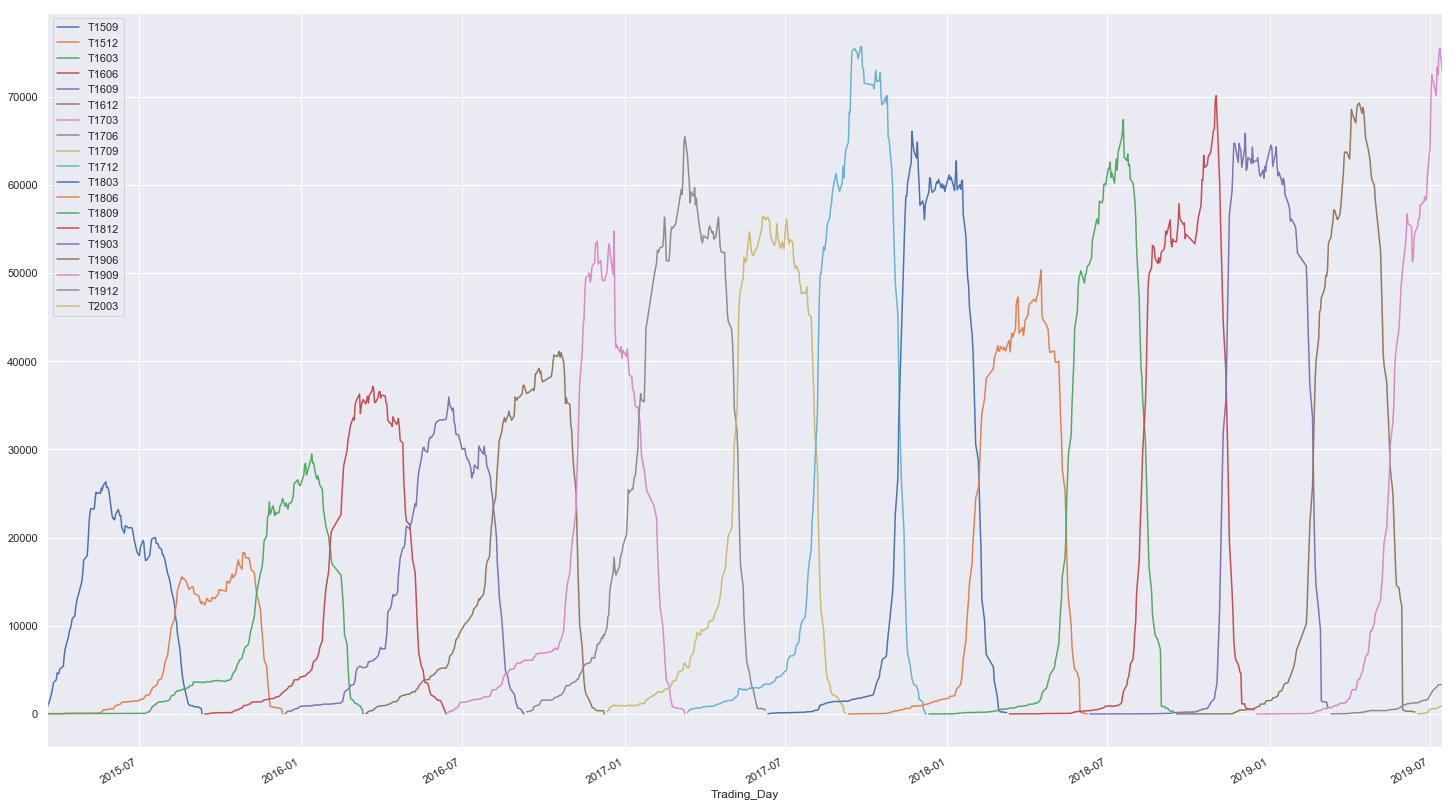

In [9]:
# plot open interest of T
T_dfs[-1].plot()

In [9]:
date_df = pd.read_csv(r'..\data\raw\meta_data\delivery_info.csv', index_col=0, parse_dates=['intention_day', 'notice_day', 'delivery_day'], infer_datetime_format=True, keep_date_col=True)

In [10]:
TS_intention_day = date_df['intention_day'][date_df.index.str.match('TS')]
TF_intention_day = date_df['intention_day'][date_df.index.str.match('TF')]
T_intention_day = date_df['intention_day'][~date_df.index.str.match('TS|TF')]

In [11]:
# get list of intention days
T_intention_list = list(T_intention_day.values)
TF_intention_list = list(TF_intention_day.values)
TS_intention_list = list(TS_intention_day.values)

In [12]:
# save data
for df in T_dfs:
    df.to_csv(r'..\data\interim\raw_features\T\T_' + df.name + '.csv')
    
for df in TF_dfs:
    df.to_csv(r'..\data\interim\raw_features\TF\TF_' + df.name + '.csv')
    
for df in TS_dfs:
    df.to_csv(r'..\data\interim\raw_features\TS\TS_' + df.name + '.csv')